In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

In [2]:
parameter_set = 'muntants_final_parameter_set' 

In [3]:
file_path_input_params_json = '../../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'SI/S16_model_validation/'+parameter_set+'/Olesen_paper'
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path /home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S16_model_validation/muntants_final_parameter_set/Olesen_paper
parameter_path /home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S16_model_validation/muntants_final_parameter_set/Olesen_paper/parameter_set.csv


In [4]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

In [5]:
data_frame = makeDataframe.make_dataframe(file_path)
data_frame = makeDataframe.add_average_values_to_df(data_frame)
data_frame = makeDataframe.add_theoretical_init_reg_concentrations_to_df(data_frame)

['/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S16_model_validation/muntants_final_parameter_set/Olesen_paper/WT',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S16_model_validation/muntants_final_parameter_set/Olesen_paper/del_datA',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S16_model_validation/muntants_final_parameter_set/Olesen_paper/del_dars1',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S16_model_validation/muntants_final_parameter_set/Olesen_paper/del_dars_dars1',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S16_model_validation/muntants_final_parameter_set/Olesen_paper/mutations_slow_growth.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S16_model_validation/muntants_final_parameter_set/Olesen_paper/del_dars2_dars1_datA',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatC

In [6]:
def add_label_mutation(df_row):
    if df_row.destruction_rate_datA == 0 and df_row.production_rate_dars2 == 0 and df_row.production_rate_dars1 == 0:
        return r'$\Delta D1 \Delta D2 \Delta datA$'
    elif df_row.production_rate_dars1 == 0 and df_row.production_rate_dars2 == 0:
        return r'$\Delta D1 \Delta D2$'
    elif df_row.destruction_rate_datA == 0 and df_row.production_rate_dars1 == 0:
        return r'$\Delta D1 \Delta datA$'
    elif df_row.destruction_rate_datA == 0 and df_row.production_rate_dars2 == 0:
        return r'$\Delta D2 \Delta datA$'
    elif df_row.destruction_rate_datA == 0:
        return r'$\Delta datA$'
    elif df_row.production_rate_dars1 == 0:
        return r'$\Delta D1$'
    elif df_row.production_rate_dars2 == 0:
        return r'$\Delta D2$'
#     elif df_row.destruction_rate_rida ==0:
#         return r'$\Delta Hda$'
#     elif df_row.production_rate_lipids ==0:
#         return r'$\Delta lipids$'
#     elif df_row.period_blocked ==0:
#         return r'$\Delta SeqA$'
#     elif df_row.n_c_max_0 ==0:
#         return r'no titration sites'
#     elif df_row.n_c_max_0 ==1200:
#         return r'more titration sites $n_{\rm s}=1200$'
#     elif df_row.n_c_max_0 ==600:
#         return r'more titration sites $n_{\rm s}=600$'
#     elif df_row.n_c_max_0 ==100:
#         return r'less titration sites $n_{\rm s}=100$'
    else:
        return 'WT'
    
def return_init_volume_by_key(key, data_frame):
    row = data_frame.loc[data_frame['legend_mutant']==key]
    return row['v_init_per_n_ori']
    
data_frame.loc[:, 'legend_mutant'] = data_frame.apply(lambda row: add_label_mutation(row), axis = 1)
data_frame['legend_mutant']

0                                    WT
1                                    WT
2                         $\Delta datA$
3                         $\Delta datA$
4                           $\Delta D1$
5                           $\Delta D1$
6                 $\Delta D1 \Delta D2$
7                 $\Delta D1 \Delta D2$
8     $\Delta D1 \Delta D2 \Delta datA$
9     $\Delta D1 \Delta D2 \Delta datA$
10                          $\Delta D2$
11                          $\Delta D2$
12              $\Delta D1 \Delta datA$
13              $\Delta D1 \Delta datA$
14              $\Delta D2 \Delta datA$
15              $\Delta D2 \Delta datA$
Name: legend_mutant, dtype: object

# Slow growth regime

In [7]:
data_frame['doubling_rate']

0     0.5
1     2.0
2     0.5
3     2.0
4     0.5
5     2.0
6     0.5
7     2.0
8     0.5
9     2.0
10    0.5
11    2.0
12    0.5
13    2.0
14    0.5
15    2.0
Name: doubling_rate, dtype: float64

0.2796503120633776
y_labels [1.         0.88478387 1.32069456 1.25989948 1.78558243 0.88478387
 0.88478387 0.89962323]
[0 1 2 3 4 5 6 7] [1.   0.67 1.25 1.25 1.67 0.71 0.83 1.25]


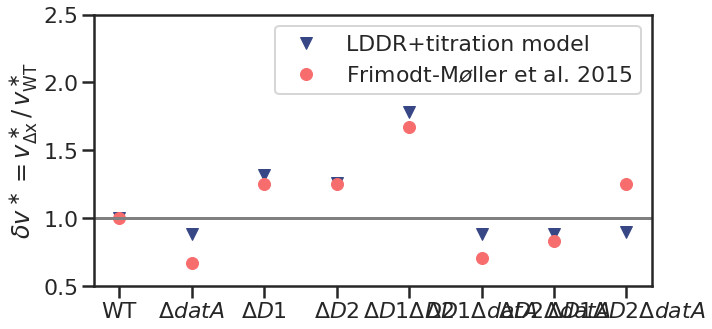

In [8]:
sns.set(style="ticks")
sns.set_context("poster") 

data_frame_slow = data_frame.loc[data_frame['doubling_rate'] == 0.5]
y_axes_experiment = np.array([1, 
                              0.67,
                              1.25, 
                              1.25, 
                              1.67, 
                              0.71, 
                              0.83, 
                              1.25
                             ]) # 0.67,

x_axes = np.array([0, 1, 2, 3, 4, 5, 6, 7])
x_axes_labels = [r'WT', 
                 r'$\Delta datA$', 
                 r'$\Delta D1$', 
                 r'$\Delta D2$', 
                 r'$\Delta D1 \Delta D2$', 
                 r'$\Delta D1 \Delta datA$', 
                 r'$\Delta D2 \Delta datA$', 
                 r'$\Delta D1 \Delta D2 \Delta datA$', 
                ] 
v_init_WT_slow = return_init_volume_by_key('WT', data_frame_slow).iloc[0]
print(v_init_WT_slow)

y_axes_simulations_relative = np.array([return_init_volume_by_key(item, data_frame_slow).iloc[0]/ v_init_WT_slow for item in x_axes_labels])
print('y_labels', y_axes_simulations_relative)
y_label = r'$\delta v^\ast = v^\ast_{\rm \Delta x} \, / \, v^\ast_{\rm WT}$'
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_axes, y_axes_simulations_relative, 'v',  label='LDDR+titration model', color=blue)
ax.plot(x_axes, y_axes_experiment, 'o',  label=r'Frimodt-M$\o$ller et al. 2015', color=pinkish_red)
print(x_axes, y_axes_experiment)
ax.set_xticks(x_axes)
ax.set_xticklabels(x_axes_labels)
ax.set_ylabel(y_label)
ax.axhline(1, color='grey')
ax.set_ylim([0.5,2.5])
ax.legend()
plt.savefig(file_path + '/mutations_slow_growth.pdf', format='pdf', bbox_inches='tight')

# Fast growth regime

In [18]:
data_frame_fast = data_frame.loc[data_frame['doubling_rate'] == 2]
data_frame_fast

,amplitude_oscillations,aspect_ratio,basal_rate_initiator,basal_rate_initiator_0,basal_rate_regulator,basal_rate_regulator_0,block_production,code_path,conc_0,continuous_oscillations,...,average_init_conc,average_init_conc_normalized,average_volume,average_n_ori,v_init_per_n_ori,v_init,average_reg_conc_th,average_init_conc_th,average_init_conc_th_normalized,legend_mutant
1,10.0,4.0,2079.441542,3000.0,48.520303,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,922.369938,2.305925,1.123268,4.008002,0.389107,1.556429,116.907484,5340.852829,13.352132,WT
3,10.0,4.0,2079.441542,3000.0,48.520303,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,995.789147,2.489473,0.849396,4.012803,0.296063,1.184253,140.899269,7048.231269,17.620578,$\Delta datA$
5,10.0,4.0,2079.441542,3000.0,48.520303,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,864.659798,2.161649,1.307411,4.005868,0.451954,1.807816,103.416167,4590.652444,11.476631,$\Delta D1$
7,10.0,4.0,2079.441542,3000.0,48.520303,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,645.076237,1.612691,2.705730,4.009069,0.937059,3.748237,51.798997,2222.463124,5.556158,$\Delta D1 \Delta D2$
9,10.0,4.0,2079.441542,3000.0,48.520303,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,789.002626,1.972507,1.586915,3.995732,0.557884,2.231537,86.791629,3775.071030,9.437678,$\Delta D1 \Delta D2 \Delta datA$
11,10.0,4.0,2079.441542,3000.0,48.520303,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,675.475149,1.688688,2.420818,4.004801,0.832966,3.331864,57.784764,2481.319781,6.203299,$\Delta D2$
13,10.0,4.0,2079.441542,3000.0,48.520303,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,993.981532,2.484954,0.870846,4.009069,0.303539,1.214155,138.791063,6870.919724,17.177299,$\Delta D1 \Delta datA$
15,10.0,4.0,2079.441542,3000.0,48.520303,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,853.953684,2.134884,1.342255,3.984529,0.469830,1.879318,100.649817,4448.312426,11.120781,$\Delta D2 \Delta datA$


0.38910724971035854
y_labels [1.         0.76087858 1.16151536 2.14071086 2.40822839 0.7800904
 1.20745502 1.4337542 ]
[0 1 2 3 4 5 6 7] [1.   0.83 1.05 1.05 1.11 0.91 0.91 1.11]


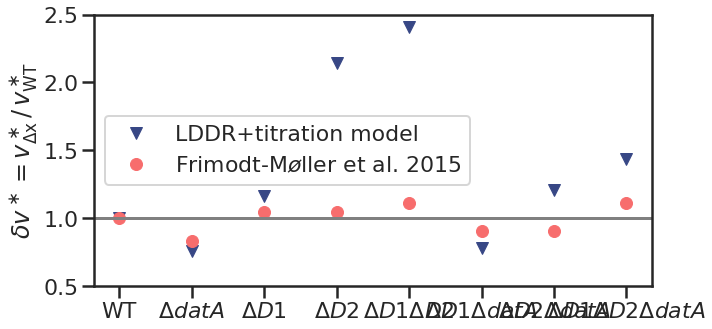

In [19]:
sns.set(style="ticks")
sns.set_context("poster") 

data_frame_fast = data_frame.loc[data_frame['doubling_rate'] == 2]
data_frame_fast

y_axes_experiment = np.array([1, 
                              0.83,
                              1.05, 
                              1.05, 
                              1.11, 
                              0.91, 
                              0.91, 
                              1.11
                             ]) # 0.67,

x_axes = np.array([0, 1, 2, 3, 4, 5, 6, 7])
x_axes_labels = [r'WT', 
                 r'$\Delta datA$', 
                 r'$\Delta D1$', 
                 r'$\Delta D2$', 
                 r'$\Delta D1 \Delta D2$', 
                 r'$\Delta D1 \Delta datA$', 
                 r'$\Delta D2 \Delta datA$', 
                 r'$\Delta D1 \Delta D2 \Delta datA$', 
                ] 
v_init_WT_fast = return_init_volume_by_key('WT', data_frame_fast).iloc[0]
print(v_init_WT_fast)

y_axes_simulations_relative = np.array([return_init_volume_by_key(item, data_frame_fast).iloc[0]/ v_init_WT_fast for item in x_axes_labels])
print('y_labels', y_axes_simulations_relative)
y_label = r'$\delta v^\ast = v^\ast_{\rm \Delta x} \, / \, v^\ast_{\rm WT}$'
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_axes, y_axes_simulations_relative, 'v',  label='LDDR+titration model', color=blue)
ax.plot(x_axes, y_axes_experiment, 'o',  label=r'Frimodt-M$\o$ller et al. 2015', color=pinkish_red)
print(x_axes, y_axes_experiment)
ax.set_xticks(x_axes)
ax.set_xticklabels(x_axes_labels)
ax.set_ylabel(y_label)
ax.axhline(1, color='grey')
ax.set_ylim([0.5,2.5])
ax.legend()
plt.savefig(file_path + '/mutations_fast_growth.pdf', format='pdf', bbox_inches='tight')